In [37]:
using Revise

In [38]:
using QuantumStates
using UnitsToValue

In [39]:
const _μB = (μ_B / h) * (1e-6 * 1e-4)
const _gL = 1.0
const _gS = gS
;

In [40]:
H_operator = :(
    T_A * DiagonalOperator +
    Be_A * Rotation + 
    Aso_A * SpinOrbit + 
    q_A * ΛDoubling_q +
    p_A * ΛDoubling_p2q + q_A * (2ΛDoubling_p2q) #+
    # B_z * (2.8024951424073063 * Zeeman_S + 
    #        1.3996244936072706 * Zeeman_L - 
    #        0.08792260424497932 * Zeeman_gl) +
    # b00_A * (Hyperfine_IF - Hyperfine_IL)
);

In [41]:
# Spectroscopic constants for CaOH, A state
parameters = @params begin
    T_A = 15998.122 * 299792458 * 1e-4
    Be_A = 0.3412200 * 299792458 * 1e-4
    Aso_A = 66.8181 * 299792458 * 1e-4
    p_A = -0.04287 * 299792458 * 1e-4
    q_A = -0.3257e-3 * 299792458 * 1e-4
    B_z = 1e-6
    b00_A = 0.
end;

In [42]:
QN_bounds = (
    v_1 = 0,
    v_2 = 0,
    ℓ = 0,
    v_3 = 0,
    Λ = (-1,1),
    I = 1/2,
    S = 1/2,
    J = 1/2:5/2
    )
basis = enumerate_states(HundsCaseA_LinearMolecule, QN_bounds)
;

In [43]:
CaOH_A000 = @time Hamiltonian(basis=basis, operator=H_operator, parameters=parameters)
@time evaluate!(CaOH_A000)
@time solve!(CaOH_A000)
;

  0.251619 seconds (1.16 M allocations: 56.140 MiB, 16.85% gc time, 63.75% compilation time: 96% of which was recompilation)
  0.000073 seconds
  0.095517 seconds (101.86 k allocations: 7.445 MiB, 97.40% compilation time)


In [44]:
@time save_to_file(CaOH_A000, "CaOH_A000", "")

  0.004046 seconds (8.74 k allocations: 199.414 KiB)


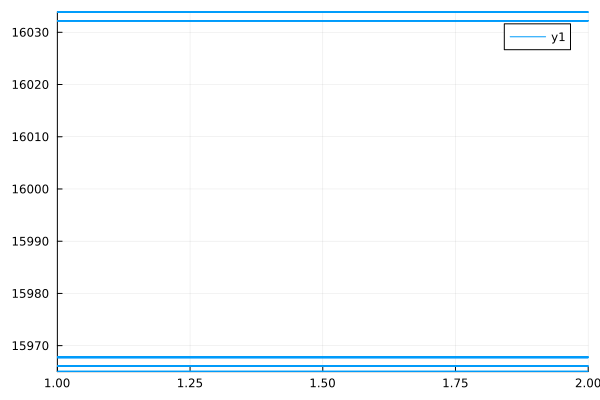

In [46]:
using Plots
hline(energy.(CaOH_A000.states) ./ c .* 1e4)